In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import catboost

### EDA

In [373]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [374]:
len(df)

145460

In [375]:
df["RainToday"] = df['RainToday'].replace({'No':0, 'Yes':1})
df["RainTomorrow"] = df['RainTomorrow'].replace({'No':0, 'Yes':1})
df["RainToday"].dtype, df["RainTomorrow"].dtype

(dtype('float64'), dtype('float64'))

In [376]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [448]:
for i in df.columns:
    x = df[i].isnull().sum()
    y=x/len(df)
    print(i , ":",x,"null =>",y,"%")

Date : 0 null => 0.0 %
Location : 0 null => 0.0 %
MinTemp : 468 null => 0.003324170555520041 %
MaxTemp : 307 null => 0.002180599060992847 %
Rainfall : 0 null => 0.0 %
Evaporation : 59694 null => 0.4240022161137037 %
Sunshine : 66805 null => 0.47451114094341096 %
WindGustDir : 0 null => 0.0 %
WindGustSpeed : 9105 null => 0.06467216433335464 %
WindDir9am : 0 null => 0.0 %
WindDir3pm : 0 null => 0.0 %
WindSpeed9am : 1055 null => 0.007493589606994964 %
WindSpeed3pm : 2531 null => 0.017977512128250477 %
Humidity9am : 1517 null => 0.01077514259129039 %
Humidity3pm : 3501 null => 0.024867352809563384 %
Pressure9am : 13743 null => 0.09761554688998274 %
Pressure3pm : 13769 null => 0.09780022303195608 %
Cloud9am : 52625 null => 0.3737916142825687 %
Cloud3pm : 56094 null => 0.39843167337893415 %
Temp9am : 656 null => 0.004659521120558006 %
Temp3pm : 2624 null => 0.018638084482232024 %
RainToday : 0 null => 0.0 %
RainTomorrow : 0 null => 0.0 %


RainTomorrow yes count : 31877
RainTomorrow no count : 110316


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

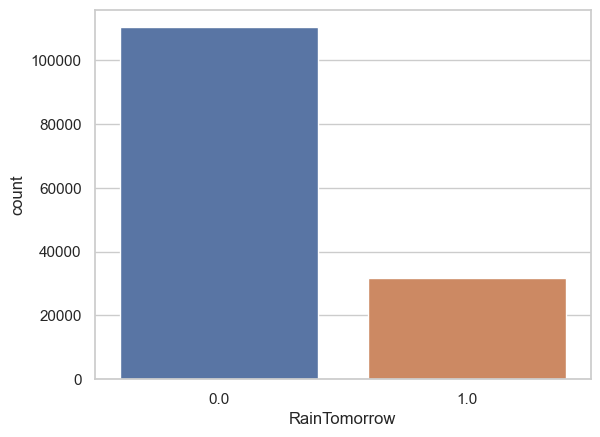

In [378]:
print("RainTomorrow yes count :",len(df["RainTomorrow"].loc[df['RainTomorrow']==1]))
print("RainTomorrow no count :",len(df["RainTomorrow"].loc[df['RainTomorrow']==0]))
sns.countplot(x='RainTomorrow', data=df)

RainToday yes count : 31455
RainToday no count : 109332


<AxesSubplot:xlabel='RainToday', ylabel='count'>

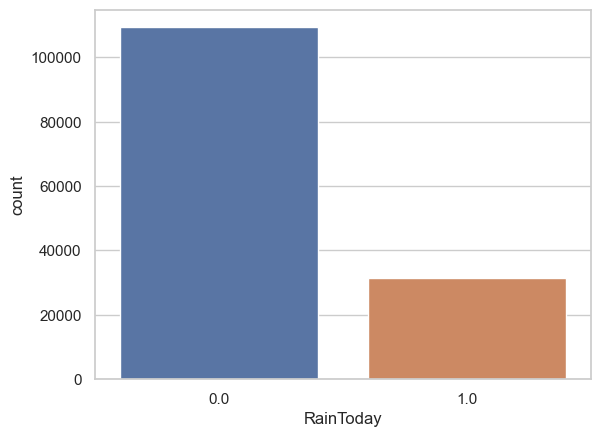

In [449]:
print("RainToday yes count :",len(df["RainToday"].loc[df['RainToday']==1]))
print("RainToday no count :",len(df["RainToday"].loc[df['RainToday']==0]))
sns.countplot(x='RainToday', data=df)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64


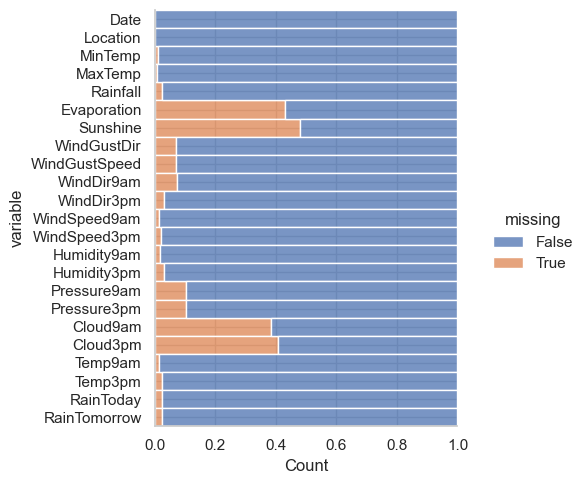

In [380]:
print(df.isnull().sum().sort_values(ascending=False))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill"
)

In [381]:
y = df.select_dtypes(include='object').columns
df[y[1]].mode()[0]

'Canberra'

In [382]:
for i in y:
     df[i]=df[i].fillna(df[i].mode()[0])

for i in y:
    print(i,":",df[i].isnull().sum())

Date : 0
Location : 0
WindGustDir : 0
WindDir9am : 0
WindDir3pm : 0


In [303]:
y = df.select_dtypes(exclude='object').columns
for i in y:
    if(i!='RainTomorrow' and i!='RainToday'):
        df[i]=df[i].fillna(df[i].mean())

for i in y:
    print(i,":",df[i].isnull().sum())

MinTemp : 0
MaxTemp : 0
Rainfall : 0
Evaporation : 0
Sunshine : 0
WindGustSpeed : 0
WindSpeed9am : 0
WindSpeed3pm : 0
Humidity9am : 0
Humidity3pm : 0
Pressure9am : 0
Pressure3pm : 0
Cloud9am : 0
Cloud3pm : 0
Temp9am : 0
Temp3pm : 0
RainToday : 3261
RainTomorrow : 3267


In [383]:
df = df[df['RainTomorrow'].notna()]
df = df[df['RainToday'].notna()]
len(df)

140787

In [305]:
dff = df.drop(columns=['Date'])

In [306]:
dff.shape

(140787, 22)

<AxesSubplot:>

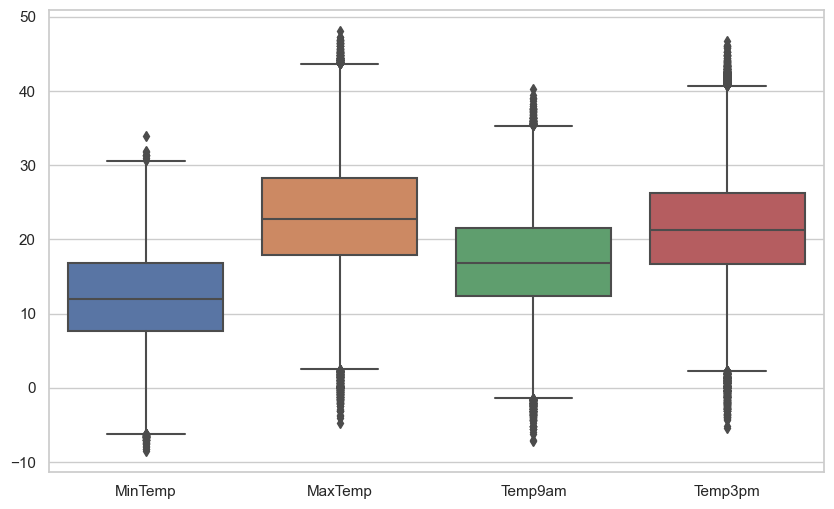

In [307]:
sns.set(style="whitegrid")
mp.figure(figsize=(10, 6))
sns.boxplot(data=dff[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

<AxesSubplot:>

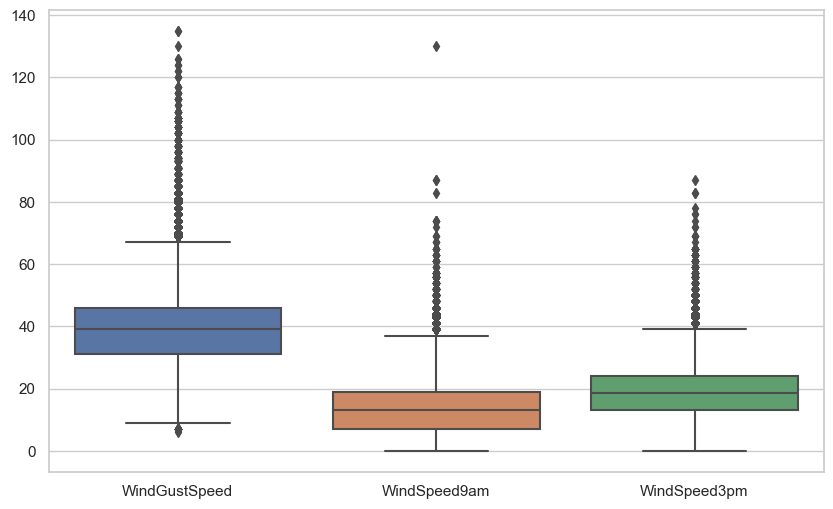

In [308]:
sns.set(style="whitegrid")
mp.figure(figsize=(10, 6))
sns.boxplot(data=dff[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

<AxesSubplot:>

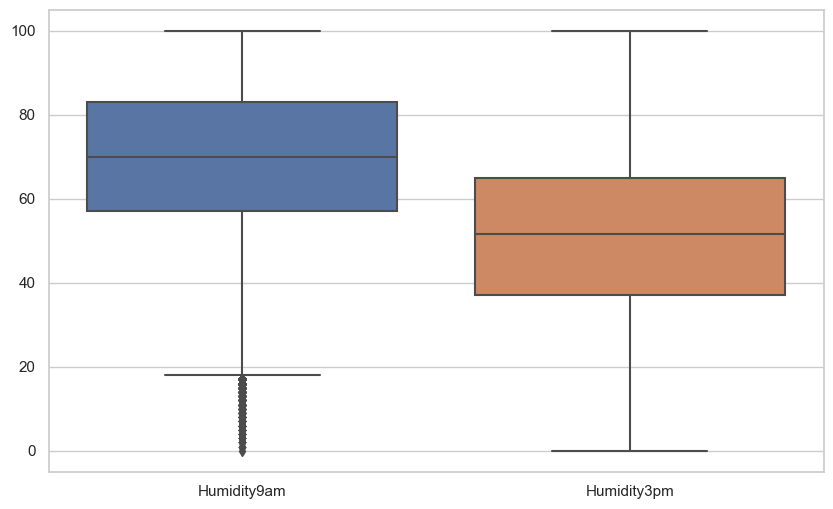

In [309]:
sns.set(style="whitegrid")
mp.figure(figsize=(10, 6))
sns.boxplot(data=dff[['Humidity9am','Humidity3pm']])

In [310]:
dff= dff[dff['Humidity3pm']!=0.0]
dff= dff[dff['Humidity9am']!=0.0]
len(dff)

140783

<AxesSubplot:>

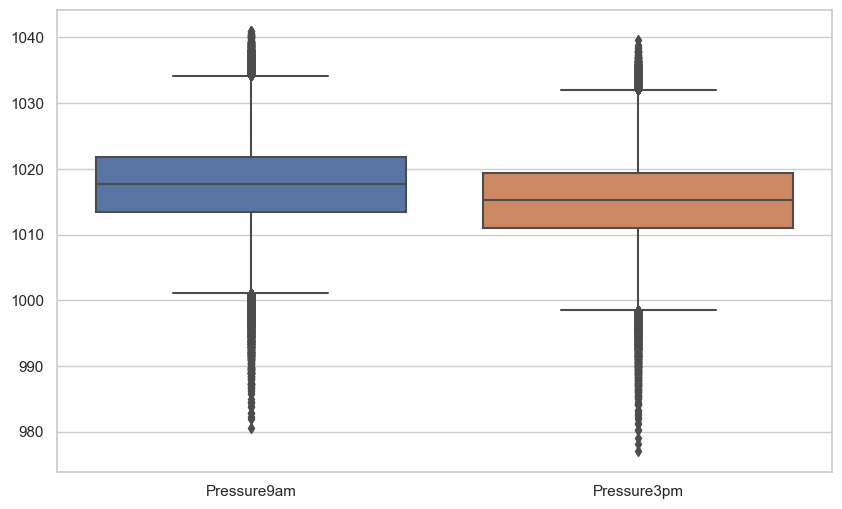

In [311]:
sns.set(style="whitegrid")
mp.figure(figsize=(10, 6))
sns.boxplot(data=dff[['Pressure9am','Pressure3pm']])

<AxesSubplot:>

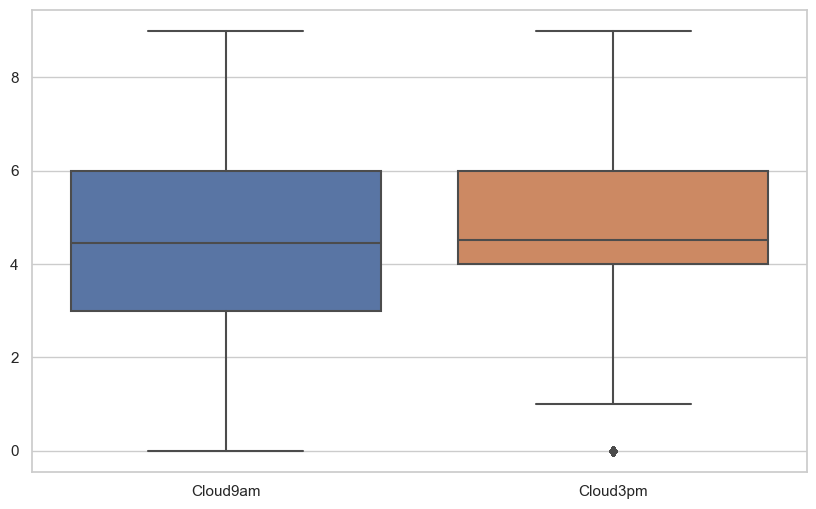

In [312]:
sns.set(style="whitegrid")
mp.figure(figsize=(10, 6))
sns.boxplot(data=dff[['Cloud9am','Cloud3pm']])

<AxesSubplot:>

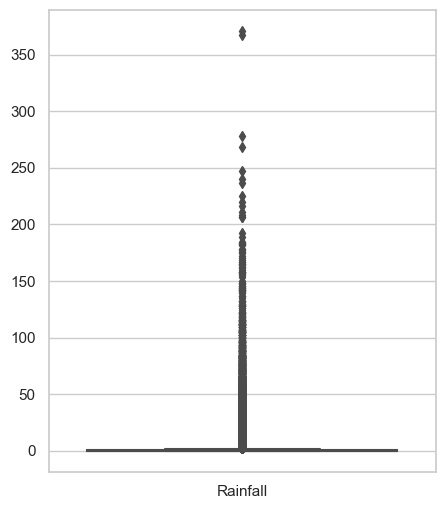

In [313]:
sns.set(style="whitegrid")
mp.figure(figsize=(5, 6))
sns.boxplot(data=dff[['Rainfall']])

<AxesSubplot:>

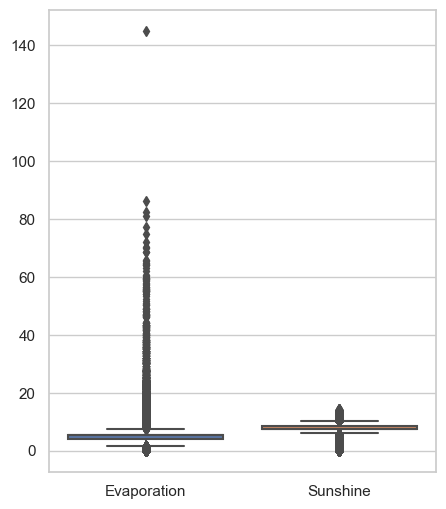

In [314]:
sns.set(style="whitegrid")
mp.figure(figsize=(5, 6))
sns.boxplot(data=dff[['Evaporation','Sunshine']])

In [288]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [289]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [384]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [385]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [386]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = df.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [387]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1531.000000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.300000
Rainfall            0.800000
Evaporation         4.325726
Sunshine            5.200000
WindGustDir         9.000000
WindGustSpeed      17.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       12.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        29.000000
Pressure9am         8.600000
Pressure3pm         8.600000
Cloud9am            5.000000
Cloud3pm            4.359432
Temp9am             9.300000
Temp3pm             9.900000
RainToday           0.000000
RainTomorrow        0.000000
dtype: float64


In [388]:
x = MiceImputed.drop(columns=['RainTomorrow', 'Date'])
y = MiceImputed['RainTomorrow']

In [389]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112629, 21), (112629,), (28158, 21), (28158,))

In [390]:
for i in y_train:
    if (i!=1 and i!=0):
        print(i)

In [391]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [392]:
x_train_res.shape, y_train_res.shape

((175378, 21), (175378,))

In [393]:
dtc =DecisionTreeClassifier(max_depth=13)
dtc.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=13)

In [394]:
y_pred = dtc.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [395]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.8259464450600185
Precision : 0.7212905286695416
Recall : 0.5886339937434828


In [396]:
conf_matrix

array([[18741,  1745],
       [ 3156,  4516]], dtype=int64)

In [328]:
knn = KNeighborsClassifier(n_neighbors = 15, metric='euclidean')
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [329]:
y_pred = knn.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [330]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.7705011187271371
Precision : 0.7968479117415288
Recall : 0.4942809658813178


In [331]:
conf_matrix

array([[16639,  1289],
       [ 5173,  5056]], dtype=int64)

In [429]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 16, min_samples_leaf=1, min_samples_split=2)
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=16)

In [430]:
y_pred = rf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [432]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.8730023439164714
Precision : 0.7454080817760741
Recall : 0.7019100616634081


In [433]:
conf_matrix

array([[19915,  1594],
       [ 1982,  4667]], dtype=int64)

In [345]:
xgb = xgboost.XGBClassifier(objective='binary:logistic', random_state=42, max_depth=16, n_estimators=300)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=16, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [346]:
y_pred = xgb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [347]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.8605675320524203
Precision : 0.5637509850275808
Recall : 0.7554382259767688


In [340]:
conf_matrix

array([[20512,  2719],
       [ 1300,  3626]], dtype=int64)

In [397]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(x_train_res, y_train_res)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

In [398]:
y_pred = lr.predict(x_test)
y_pred

array([1., 0., 0., ..., 0., 1., 0.])

In [399]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.8085446409546132
Precision : 0.7963584091998084
Recall : 0.5477916941331575


In [400]:
conf_matrix

array([[17781,  1275],
       [ 4116,  4986]], dtype=int64)

In [420]:
xgb_2 = xgboost.XGBClassifier(n_estimators=600, max_depth=16)
xgb_2.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=16, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [421]:
y_pred = xgb_2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [422]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.9030826052986718
Precision : 0.7220891231432679
Recall : 0.820508166969147


In [423]:
conf_matrix

array([[20908,  1740],
       [  989,  4521]], dtype=int64)

In [426]:
knn_2 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn_2.fit(x_train_res, y_train_res)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [427]:
y_pred = knn_2.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [428]:
conf_matrix = confusion_matrix(y_pred, y_test)
print("Accuracy :",accuracy_score(y_pred, y_test))
print("Precision :",precision_score(y_pred, y_test))
print("Recall :",recall_score(y_pred, y_test))

Accuracy : 0.7819802542794233
Precision : 0.8014694138316563
Recall : 0.5061529150695986


### Bagging

In [1]:
model =  BaggingClassifier(base_estimator=dtc, n_estimators=500, random_state = 42, oob_score=True, max_features =6 )
model.fit(x_train, y_train)
print(model.oob_score_)
print(model.score(x_test, y_test))
y_pred = model.predict(x_test)

NameError: name 'BaggingClassifier' is not defined

In [435]:
model =  BaggingClassifier(base_estimator=knn_2, n_estimators=500, random_state = 42, oob_score=True, max_features =6 )
model.fit(x_train, y_train)
print(model.oob_score_)
print(model.score(x_test, y_test))

KeyboardInterrupt: 

In [436]:
model =  BaggingClassifier(base_estimator=xgb_2, n_estimators=500, random_state = 42, oob_score=True, max_features =6 )
model.fit(x_train, y_train)
print(model.oob_score_)
print(model.score(x_test, y_test))

KeyboardInterrupt: 

In [ ]:
model =  BaggingClassifier(base_estimator=rf, n_estimators=500, random_state = 42, oob_score=True, max_features =6 )
model.fit(x_train, y_train)
print(model.oob_score_)
print(model.score(x_test, y_test))

In [438]:
dataset = MiceImputed.sample(frac=1)

In [439]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
59166,1420.0,6.0,15.2,20.1,0.2,2.919349,3.035596,14.0,20.000000,2.0,...,90.0,72.0,1023.800000,1023.000000,8.000000,8.000000,16.1,19.6,0.0,0.0
15381,701.0,24.0,13.8,22.3,0.0,5.321677,5.858616,13.0,61.631674,9.0,...,65.0,57.0,1014.098761,1012.102825,6.000000,6.000000,20.4,21.3,0.0,1.0
24299,567.0,30.0,13.9,19.2,8.2,3.119101,3.909785,9.0,48.000000,12.0,...,91.0,66.0,1014.585659,1013.472797,6.604039,6.284534,15.7,18.1,1.0,1.0
140485,1617.0,13.0,22.9,31.9,0.0,6.600000,10.800000,0.0,46.000000,9.0,...,60.0,44.0,1011.700000,1007.900000,2.000000,3.000000,26.0,31.9,0.0,0.0
73867,2323.0,25.0,1.0,13.9,0.0,0.527833,6.791808,2.0,22.000000,9.0,...,91.0,51.0,1034.000000,1030.600000,4.075054,3.729935,4.6,13.5,0.0,0.0


In [445]:
dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Boosting

Exception ignored in: <function Booster.__del__ at 0x000002A7617B1360>
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 1513, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
KeyboardInterrupt: 
Exception ignored in: <function Booster.__del__ at 0x000002A7617B1360>
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py", line 1513, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
KeyboardInterrupt: 


KeyboardInterrupt: 

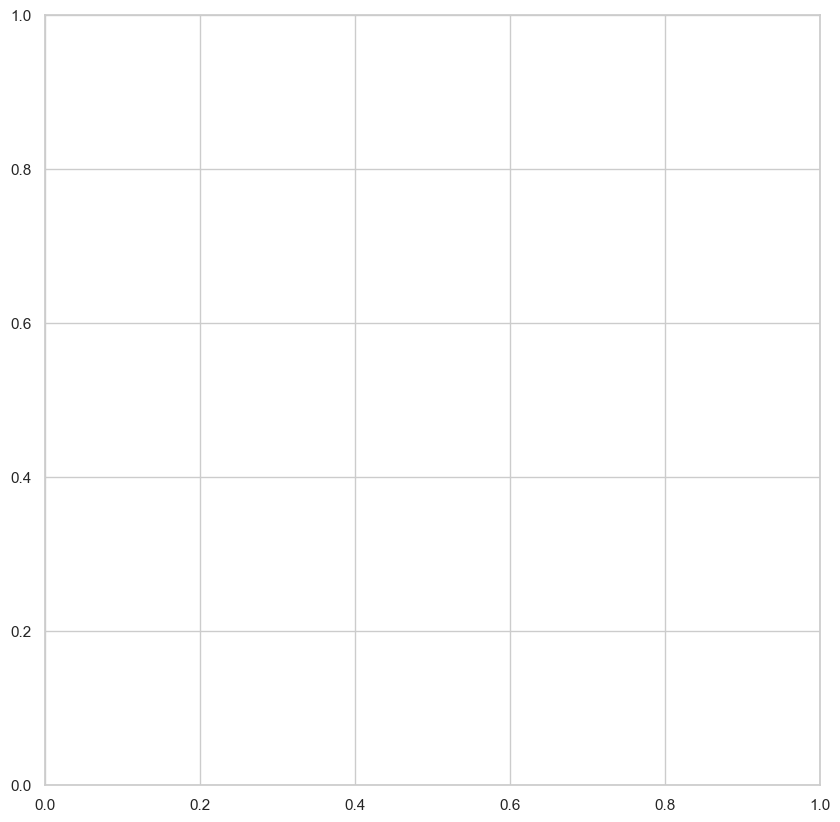

In [447]:
class Boosting:

    def __init__(self,dataset,T,test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
    
    def fit(self):
        # Set the descriptive features and the target feature
        X = self.dataset.drop(['RainTomorrow'],axis=1)
        Y = self.dataset['RainTomorrow'].where(self.dataset['RainTomorrow']==1,-1)

        # Initialize the weights of each sample with wi = 1/N and create a dataframe in which the evaluation is computed
        Evaluation = pd.DataFrame(Y.copy())
        Evaluation['weights'] = 1/len(self.dataset) # Set the initial weights w = 1/N
        

        # Run the boosting algorithm by creating T "weighted models"
        
        alphas = [] 
        models = []
        
        for t in range(self.T):

            # Train the Decision Stump(s)
            Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=16)
            model = Tree_model.fit(X,Y,sample_weight=np.array(Evaluation['weights'])) 
            
            # Append the single weak classifiers to a list which is later on used to make the 
            # weighted decision
            models.append(model)
            predictions = model.predict(X)
            score = model.score(X,Y)

            # Add values to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['RainTomorrow'],1,0)
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['RainTomorrow'],1,0)

            # Calculate the misclassification rate and accuracy
            accuracy = sum(Evaluation['evaluation'])/len(Evaluation['evaluation'])
            misclassification = sum(Evaluation['misclassified'])/len(Evaluation['misclassified'])


            # Caclulate the error
            err = np.sum(Evaluation['weights']*Evaluation['misclassified'])/np.sum(Evaluation['weights'])
 
   
            # Calculate the alpha values
            alpha = np.log((1-err)/err)
            alphas.append(alpha)


            # Update the weights wi --> These updated weights are used in the sample_weight parameter
            # for the training of the next decision stump. 
            Evaluation['weights'] *= np.exp(alpha*Evaluation['misclassified'])

            #print('The Accuracy of the {0}. model is : '.format(t+1),accuracy*100,'%')
            #print('The missclassification rate is: ',misclassification*100,'%')
        
        self.alphas = alphas
        self.models = models
            
    def predict(self):
        X_test = self.test_dataset.drop(['RainTomorrow'],axis=1)
        Y_test = self.test_dataset['RainTomorrow'].where(self.dataset['RainTomorrow']==1,-1)
        # With each model in the self.model list, make a prediction 
        
        accuracy = []
        predictions = []
        
        for alpha,model in zip(self.alphas,self.models):
            prediction = alpha*model.predict(X_test) # We use the predict method for the single decisiontreeclassifier models in the list
            predictions.append(prediction)
            self.accuracy.append(np.sum(np.sign(np.sum(np.array(predictions),axis=0))==Y_test.values)/len(predictions[0]))
           
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0)) 

number_of_base_learners = 100

fig = mp.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


for i in range(number_of_base_learners):
    model = Boosting(dataset,i,dataset)
    model.fit()
    model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
mp.show()   